In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
pio.templates.default = "plotly_white"

data = pd.read_csv("UNICEF_IND.csv", encoding='latin-1')


In [2]:
# Display the first few rows of the dataset
data.head()

# Check the data types and null values
data.info()

# Summary statistics for numeric variables
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DATAFLOW                         52 non-null     object 
 1   REF_AREA:Geographic area         52 non-null     object 
 2   INDICATOR:Indicator              52 non-null     object 
 3   SEX:Sex                          52 non-null     object 
 4   WEALTH_QUINTILE:Wealth Quintile  52 non-null     object 
 5   TIME_PERIOD:Time period          52 non-null     int64  
 6   OBS_VALUE:Observation Value      52 non-null     float64
 7   DATA_SOURCE:Data Source          52 non-null     object 
 8   COUNTRY_NOTES:Country notes      52 non-null     object 
 9   UNIT_MEASURE:Unit of measure     52 non-null     object 
 10  REF_PERIOD:Reference Period      0 non-null      float64
 11  LOWER_BOUND:Lower Bound          52 non-null     float64
 12  UPPER_BOUND:Upper Bound 

,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,REF_PERIOD:Reference Period,LOWER_BOUND:Lower Bound,UPPER_BOUND:Upper Bound
count,52.000000,52.000000,0.0,52.000000,52.000000
mean,1995.500000,51.256941,NaN,48.094128,54.622851
std,15.154757,20.199464,NaN,18.906358,21.647633
min,1970.000000,19.118430,NaN,17.060275,21.379132
25%,1982.750000,33.914185,NaN,31.772386,36.151888
50%,1995.500000,50.544255,NaN,47.772095,53.424821
75%,2008.250000,67.992545,NaN,64.119518,72.252956
max,2021.000000,84.949849,NaN,78.371977,92.136310


In [3]:
from data_stats import read_unicef_data, check_missing_values, clean_unicef_data

# Specify the path to your dataset CSV file
csv_file = 'UNICEF_IND.csv'

# 1. Read the dataset using the read_unicef_data function
df = read_unicef_data(csv_file)

# 2. Check for missing values using the check_missing_values function
missing_values = check_missing_values(csv_file)
print("Missing Values:\n", missing_values)

# 3. Clean the dataset using the clean_unicef_data function
cleaned_df = clean_unicef_data(df)

# Display the first few rows of the cleaned DataFrame to verify the result
cleaned_df.head()

Missing Values:
 DATAFLOW                            0
REF_AREA:Geographic area            0
INDICATOR:Indicator                 0
SEX:Sex                             0
WEALTH_QUINTILE:Wealth Quintile     0
TIME_PERIOD:Time period             0
OBS_VALUE:Observation Value         0
DATA_SOURCE:Data Source             0
COUNTRY_NOTES:Country notes         0
UNIT_MEASURE:Unit of measure        0
REF_PERIOD:Reference Period        52
LOWER_BOUND:Lower Bound             0
UPPER_BOUND:Upper Bound             0
OBS_STATUS:Observation Status       0
dtype: int64


,Year,Neonatal_Mortality_Rate,Sex,Wealth_Quintile,Indicator,Country_Notes,Unit_Measure,Lower_Bound,Upper_Bound
0,1970,84.949849,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",78.371977,92.136310
1,1971,84.217018,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",78.045814,91.113473
2,1972,83.481996,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",77.508706,90.030670
3,1973,82.564652,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",76.778730,88.917560
4,1974,81.527559,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",75.995238,87.594828


In [4]:
# Display summary statistics of the numerical columns
df = pd.read_csv('UNICEF_IND.csv')
df.describe()

,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,REF_PERIOD:Reference Period,LOWER_BOUND:Lower Bound,UPPER_BOUND:Upper Bound
count,52.000000,52.000000,0.0,52.000000,52.000000
mean,1995.500000,51.256941,NaN,48.094128,54.622851
std,15.154757,20.199464,NaN,18.906358,21.647633
min,1970.000000,19.118430,NaN,17.060275,21.379132
25%,1982.750000,33.914185,NaN,31.772386,36.151888
50%,1995.500000,50.544255,NaN,47.772095,53.424821
75%,2008.250000,67.992545,NaN,64.119518,72.252956
max,2021.000000,84.949849,NaN,78.371977,92.136310


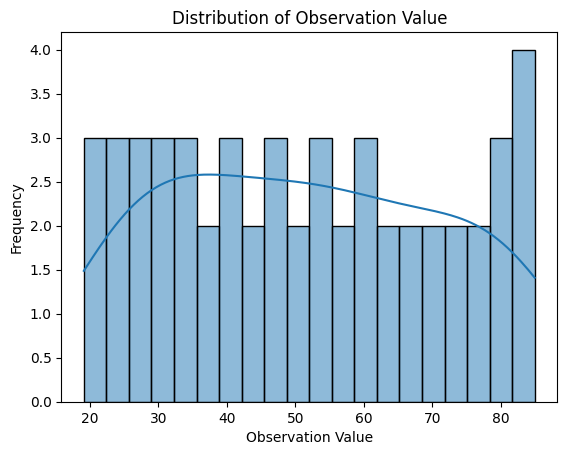

In [5]:
# Plot histograms for numerical variables
sns.histplot(df['OBS_VALUE:Observation Value'], bins=20, kde=True)
plt.xlabel('Observation Value')
plt.ylabel('Frequency')
plt.title('Distribution of Observation Value')
plt.show()

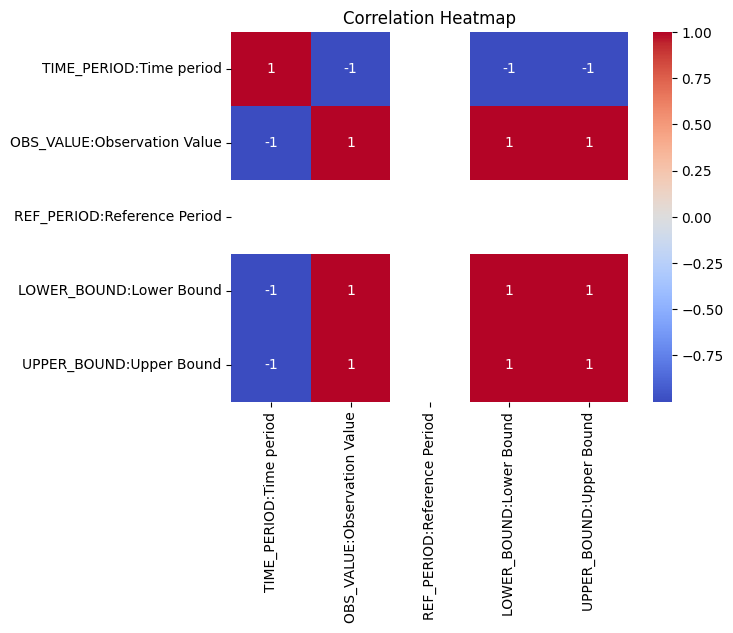

In [6]:
# Read your dataset
df = pd.read_csv('UNICEF_IND.csv')

# Select only the numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numerical_columns.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()